In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm

%matplotlib inline

In [2]:
from sklearn import manifold as sk_man

def red_fn(x):
    return sk_man.TSNE(n_components=2, n_jobs=-1).fit_transform(x)

In [3]:
def load_labels(dataset, idx=0):
    with open(f'../../data/datasets/{dataset}.pkl', 'rb') as fin:
        xy = pickle.load(fin)['Xy'][idx]
    return np.array([*xy['train']['y'], *xy['val']['y'], *xy['test']['y']])


In [4]:
def load_vectors(dataset, model, idx=0):
    with open(f'../../data/vectors/{dataset}/{model}/{idx}.pkl', 'rb') as fin:
        vecs = pickle.load(fin)
    
    vecs = np.array(vecs)
    vecs_2d = red_fn(vecs)
    return vecs_2d


In [5]:
def make_plots(v, m, y):
    v = v[m]
    fig, axs = plt.subplots(nrows=1, ncols=len(v.keys()), figsize=(20, 3))
    
    for k, ax in zip(v.keys(), axs):        
        x1, x2 = zip(*v[k]['vecs'])    
        g = sns.scatterplot(
            x=x1, y=x2, hue=y, 
            palette='Set2',
            marker='o',
            ax=ax,
        )
        g.legend_.remove()
        
        dim = v[k]['dim']
        ax.set(xticks=[], yticks=[])
        ax.set_title(f'{k}', size=16, weight='bold')
    
    axs[0].set_ylabel(m, size=16, weight='bold')
    
    fig.tight_layout()
    return fig

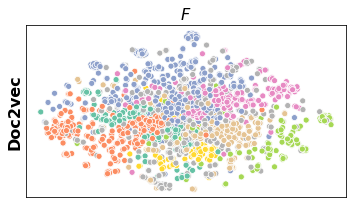

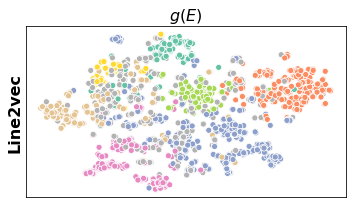

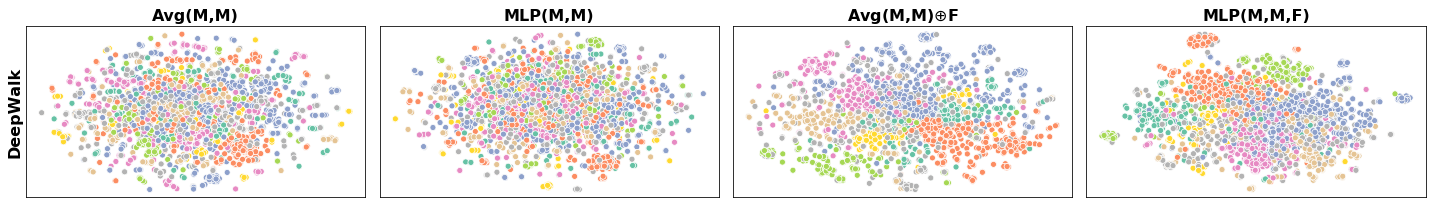

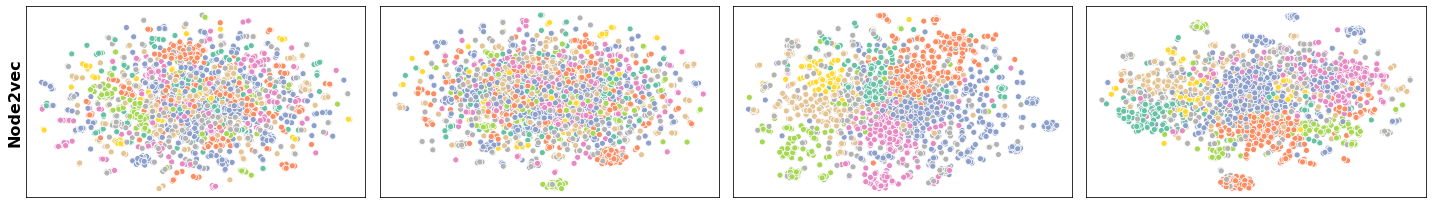

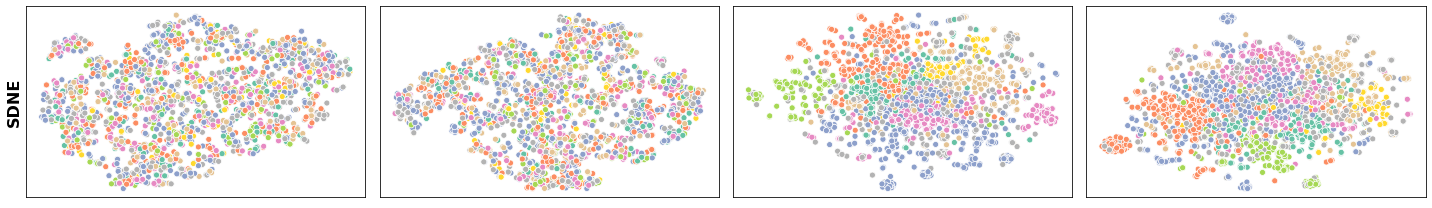

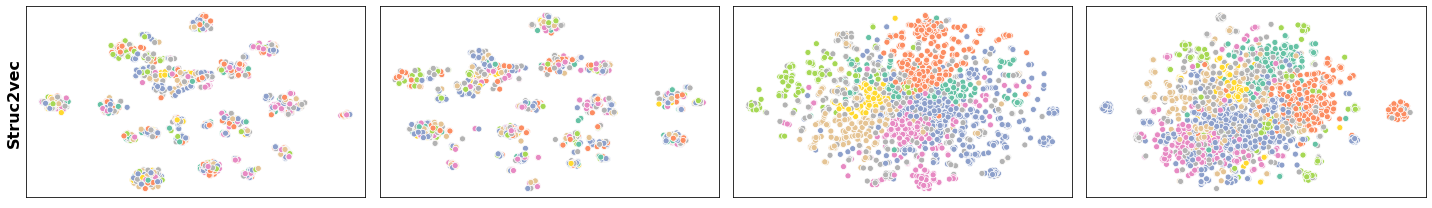

In [7]:
grid_transductive = [
    {'group': 'Doc2vec', 'paths': [('$F$', 'BL_simple/full')], 'set_title': True},
    {'group': 'Line2vec', 'paths': [('$g(E)$', 'BL_line2vec')], 'set_title': True},
    
    {'group': 'DeepWalk', 'paths': [
        ('Avg(M,M)', 'BL_dw/nf/full'),
        ('MLP(M,M)', 'MLP_dw/MLP2'),
        ('Avg(M,M)$\oplus$F', 'BL_dw/nfef/full'),
        ('MLP(M,M,F)', 'MLP_dw/MLP3'),
    ], 'set_title': True},
    {'group': 'Node2vec', 'paths': [
        ('Avg(M,M)', 'BL_n2v/nf/full'),
        ('MLP(M,M)', 'MLP_n2v/MLP2'),
        ('Avg(M,M)$\oplus$F', 'BL_n2v/nfef/full'),
        ('MLP(M,M,F)', 'MLP_n2v/MLP3'),
    ]},
    {'group': 'SDNE', 'paths': [
        ('Avg(M,M)', 'BL_sdne/nf/full'),
        ('MLP(M,M)', 'MLP_sdne/MLP2'),
        ('Avg(M,M)$\oplus$F', 'BL_sdne/nfef/full'),
        ('MLP(M,M,F)', 'MLP_sdne/MLP3'),
    ]},
    {'group': 'Struc2vec', 'paths': [
        ('Avg(M,M)', 'BL_struc2vec/nf/full'),
        ('MLP(M,M)', 'MLP_struc2vec/MLP2'),
        ('Avg(M,M)$\oplus$F', 'BL_struc2vec/nfef/full'),
        ('MLP(M,M,F)', 'MLP_struc2vec/MLP3'),
    ]},
]

DATASET = 'cora'
IDX = 2

y = load_labels(DATASET, IDX)

for ge in tqdm(grid_transductive):
    ncols = len(ge['paths'])
    fig, axs = plt.subplots(ncols=ncols, figsize=(5 * ncols, 3), squeeze=False)
    axs = axs.ravel()
 
    for (name, path), ax in zip(ge['paths'], axs):
        x1, x2 = zip(*load_vectors(DATASET, path, IDX))    
        g = sns.scatterplot(
            x=x1, y=x2, hue=y, 
            palette='Set2',
            marker='o',
            ax=ax,
        )
        g.legend_.remove()
        
        ax.set(xticks=[], yticks=[])
        
        if ge.get('set_title', False):
            ax.set_title(name, size=16, weight='bold')
        
    axs[0].set_ylabel(ge['group'], size=16, weight='bold')
    fig.tight_layout()
    fig.savefig(f'../../data/paper/tsne_new/{ge["group"]}_{DATASET}_{IDX}.png')

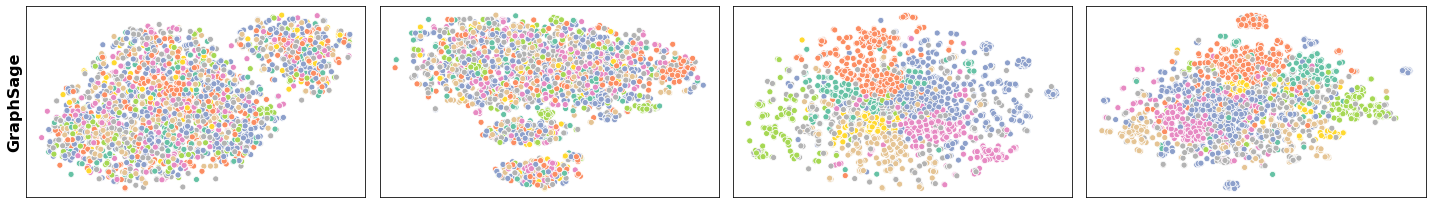

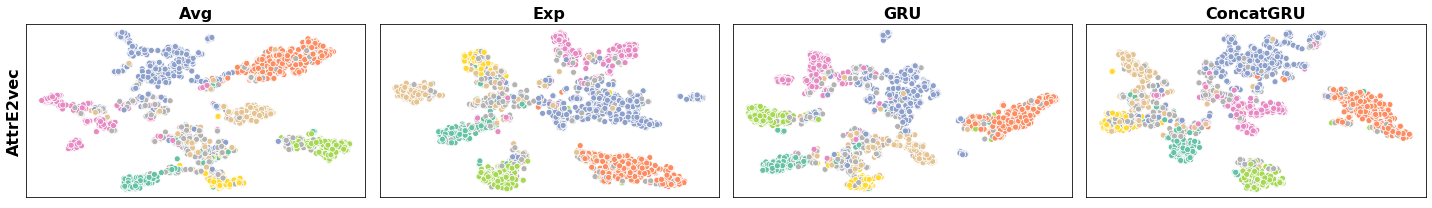

In [8]:
grid_inductive = [
    {'group': 'GraphSage', 'paths': [
        ('Avg(M,M)', 'BL_graphsage/nf/full'),
        ('MLP(M,M)', 'MLP_graphsage/MLP2'),
        ('Avg(M,M)$\oplus$F', 'BL_graphsage/nfef/full'),
        ('MLP(M,M,F)', 'MLP_graphsage/MLP3'),
    ]},
    {'group': 'AttrE2vec', 'paths': [
        ('Avg', 'AttrE2vec_Avg'),
        ('Exp', 'AttrE2vec_Exp'),
        ('GRU', 'AttrE2vec_GRU'),
        ('ConcatGRU', 'AttrE2vec_ConcatGRU'),
    ], 'set_title': True},
]

DATASET = 'cora'
IDX = 2

y = load_labels(DATASET, IDX)

for ge in tqdm(grid_inductive):
    ncols = len(ge['paths'])
    fig, axs = plt.subplots(ncols=ncols, figsize=(5 * ncols, 3), squeeze=False)
    axs = axs.ravel()
 
    for (name, path), ax in zip(ge['paths'], axs):
        x1, x2 = zip(*load_vectors(DATASET, path, IDX))    
        g = sns.scatterplot(
            x=x1, y=x2, hue=y, 
            palette='Set2',
            marker='o',
            ax=ax,
        )
        g.legend_.remove()
        
        ax.set(xticks=[], yticks=[])
        
        if ge.get('set_title', False):
            ax.set_title(name, size=16, weight='bold')
        
    axs[0].set_ylabel(ge['group'], size=16, weight='bold')
    fig.tight_layout()
    fig.savefig(f'../../data/paper/tsne_new/{ge["group"]}_{DATASET}_{IDX}.png')